In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/ANKIT/Desktop/Data Mining Project/train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df['User_ID'].describe()

count    5.500680e+05
mean     1.003029e+06
std      1.727592e+03
min      1.000001e+06
25%      1.001516e+06
50%      1.003077e+06
75%      1.004478e+06
max      1.006040e+06
Name: User_ID, dtype: float64

In [7]:
df['Product_ID'].describe()

count        550068
unique         3631
top       P00265242
freq           1880
Name: Product_ID, dtype: object

In [8]:
print(df['Age'].unique())
df['Age'].describe()

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [9]:
print(df['City_Category'].unique())
df['City_Category'].describe()

['A' 'C' 'B']


count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object

In [10]:
print(df.groupby('City_Category')['City_Category'].count())

City_Category
A    147720
B    231173
C    171175
Name: City_Category, dtype: int64


In [11]:
print(df['Gender'].unique())
df['Gender'].describe()

['F' 'M']


count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

In [12]:
print(df.groupby('Gender')['Gender'].count())

Gender
F    135809
M    414259
Name: Gender, dtype: int64


In [13]:
print(df['Marital_Status'].unique())
df['Marital_Status'].describe()

[0 1]


count    550068.000000
mean          0.409653
std           0.491770
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64

In [14]:
print(df.groupby('Marital_Status')['Marital_Status'].count())

Marital_Status
0    324731
1    225337
Name: Marital_Status, dtype: int64


In [15]:
print(df['Occupation'].unique())
df['Occupation'].describe()

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

In [16]:
print(df.groupby('Occupation')['Occupation'].count())

Occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64


In [17]:
print(df['Product_Category_1'].unique())
df['Product_Category_1'].describe()

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [18]:
print(df.groupby('Product_Category_1')['Product_Category_1'].count())

Product_Category_1
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64


In [19]:
print(df['Product_Category_2'].unique())
df['Product_Category_2'].describe()

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [20]:
print(df.groupby('Product_Category_2')['Product_Category_1'].count())

Product_Category_2
2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_1, dtype: int64


In [21]:
print(df['Product_Category_3'].unique())
df['Product_Category_3'].describe()

[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [22]:
print(df.groupby('Product_Category_3')['Product_Category_3'].count())

Product_Category_3
3.0       613
4.0      1875
5.0     16658
6.0      4890
8.0     12562
9.0     11579
10.0     1726
11.0     1805
12.0     9246
13.0     5459
14.0    18428
15.0    28013
16.0    32636
17.0    16702
18.0     4629
Name: Product_Category_3, dtype: int64


In [23]:
df.fillna(0, inplace=True)

In [24]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [25]:
print(df.groupby('Product_Category_1')['Product_Category_1'].count())
df['Product_Category_1'].isnull()

Product_Category_1
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
550038    False
550039    False
550040    False
550041    False
550042    False
550043    False
550044    False
550045    False
550046    False
550047    False
550048    False
550049    False
550050    False
550051    False
550052    False
550053    False
550054    False
550055    False
550056    False
550057    False
550058    False
550059    False
550060    False
550061    False
550062    False
550063    False
550064    False
550065    False
550066    False
550067    False
Name: Product_Category_1

In [26]:
print(df.groupby('Product_Category_2')['Product_Category_1'].count())
df['Product_Category_2'].isnull()

Product_Category_2
0.0     173638
2.0      49217
3.0       2884
4.0      25677
5.0      26235
6.0      16466
7.0        626
8.0      64088
9.0       5693
10.0      3043
11.0     14134
12.0      5528
13.0     10531
14.0     55108
15.0     37855
16.0     43255
17.0     13320
18.0      2770
Name: Product_Category_1, dtype: int64


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
550038    False
550039    False
550040    False
550041    False
550042    False
550043    False
550044    False
550045    False
550046    False
550047    False
550048    False
550049    False
550050    False
550051    False
550052    False
550053    False
550054    False
550055    False
550056    False
550057    False
550058    False
550059    False
550060    False
550061    False
550062    False
550063    False
550064    False
550065    False
550066    False
550067    False
Name: Product_Category_2

In [27]:
print(df.groupby('Product_Category_3')['Product_Category_1'].count())
df['Product_Category_3'].isnull()

Product_Category_3
0.0     383247
3.0        613
4.0       1875
5.0      16658
6.0       4890
8.0      12562
9.0      11579
10.0      1726
11.0      1805
12.0      9246
13.0      5459
14.0     18428
15.0     28013
16.0     32636
17.0     16702
18.0      4629
Name: Product_Category_1, dtype: int64


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
550038    False
550039    False
550040    False
550041    False
550042    False
550043    False
550044    False
550045    False
550046    False
550047    False
550048    False
550049    False
550050    False
550051    False
550052    False
550053    False
550054    False
550055    False
550056    False
550057    False
550058    False
550059    False
550060    False
550061    False
550062    False
550063    False
550064    False
550065    False
550066    False
550067    False
Name: Product_Category_3

In [28]:
df_concat_copy = df.copy()

In [29]:
user_id_encoder = LabelEncoder()
df_concat_copy['User_ID'] = user_id_encoder.fit_transform(df['User_ID'])
product_id_encoder = LabelEncoder()
df_concat_copy['Product_ID'] = product_id_encoder.fit_transform(df['Product_ID'])
age_encoder = LabelEncoder()
df_concat_copy['Age'] = age_encoder.fit_transform(df['Age'])
occupation_encoder = LabelEncoder()
df_concat_copy['Occupation'] = occupation_encoder.fit_transform(df['Occupation'])
city_category_encoder = LabelEncoder()
df_concat_copy['City_Category'] = city_category_encoder.fit_transform(df['City_Category'])
stay_encoder = LabelEncoder()
df_concat_copy['Stay_In_Current_City_Years'] = stay_encoder.fit_transform(df['Stay_In_Current_City_Years'])
gender_encoder = LabelEncoder()
df_concat_copy['Gender'] = gender_encoder.fit_transform(df['Gender'])

In [85]:
df_concat_copy.info()
print(df_concat_copy['User_ID'].head())
print(df_concat_copy['Product_ID'].head())
print(df_concat_copy['Age'].head())
print(df_concat_copy['Occupation'].head())
print(df_concat_copy['City_Category'].head())
print(df_concat_copy['Stay_In_Current_City_Years'].head())
print(df_concat_copy['Gender'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int32
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int32(5), int64(5)
memory usage: 39.9 MB
0    0
1    0
2    0
3    0
4    1
Name: User_ID, dtype: int64
0     672
1    2376
2     852
3     828
4    2734
Name: Product_ID, dtype: int32
0    0
1    0
2    0
3    0
4    6
Name: Age, dtype: int

In [31]:
df_concat_copy.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,2948.888392,1707.473323,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1685.407072,1012.201109,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1471.000000,930.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,2995.000000,1666.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,4365.000000,2550.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,5890.000000,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [32]:
df_concat_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,828,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,2734,1,6,16,2,4,0,8,0.0,0.0,7969


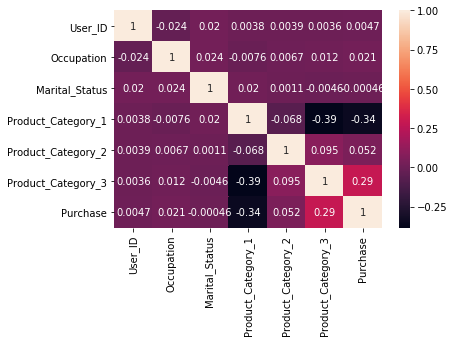

In [33]:
sns.heatmap(df.corr(), annot = True)

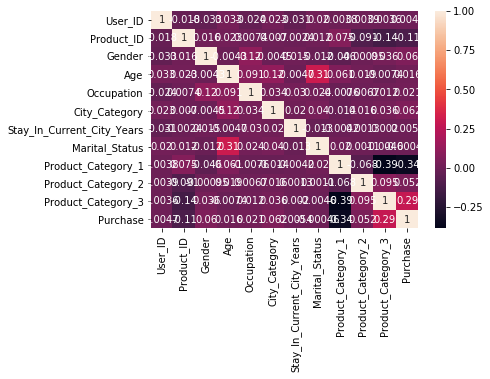

In [34]:
sns.heatmap(df_concat_copy.corr(), annot = True)

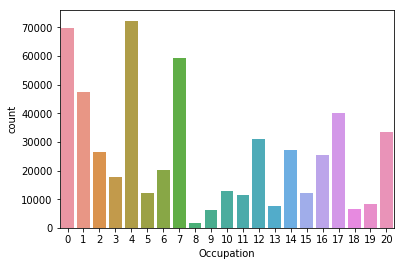

In [35]:
sns.countplot(x='Occupation',data=df )

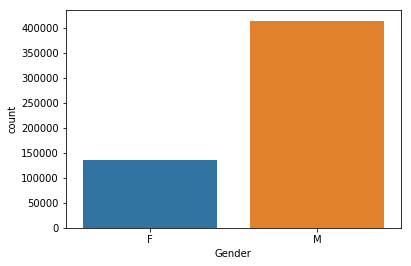

In [36]:
sns.countplot(x='Gender',data=df )

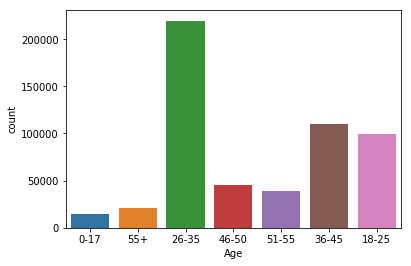

In [37]:
sns.countplot(x='Age',data=df )

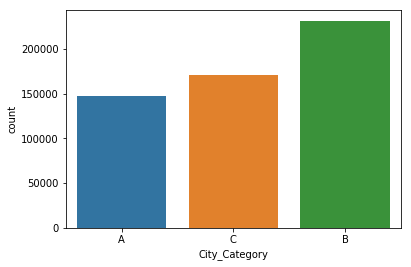

In [38]:
sns.countplot(x='City_Category',data=df )

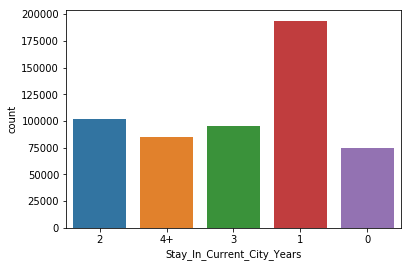

In [39]:
sns.countplot(x='Stay_In_Current_City_Years',data=df )

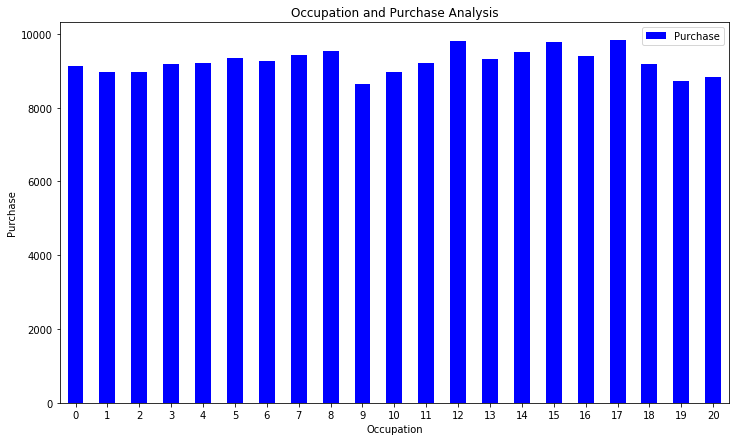

In [40]:
Occupation_pivot = df.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

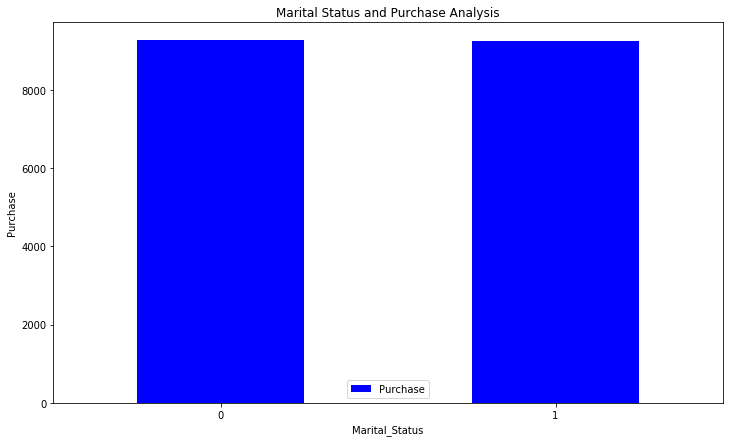

In [86]:
Marital_Status_pivot = df.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

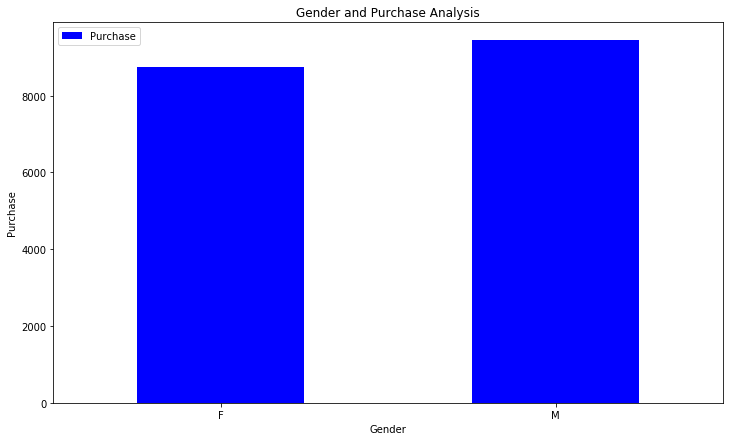

In [43]:
Gender_pivot = df.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Gender_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

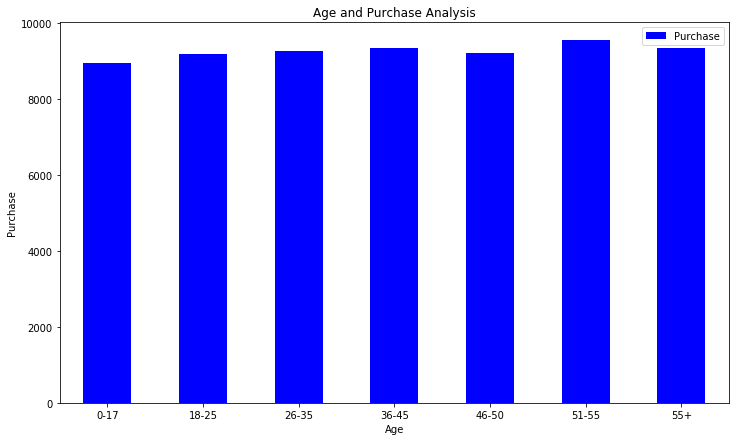

In [94]:
Age_pivot = df.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
Age_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

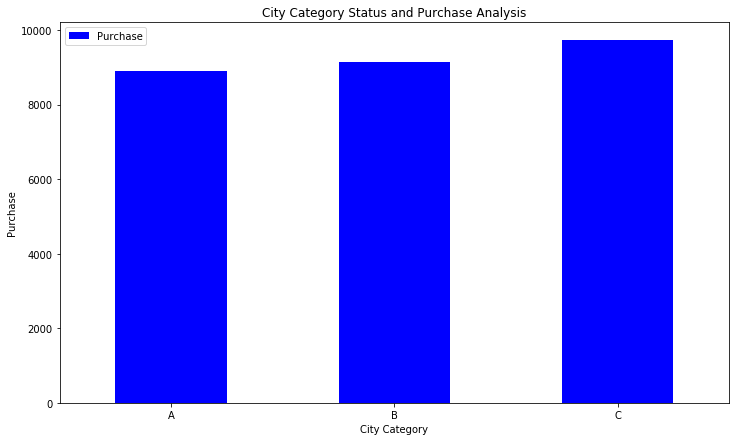

In [79]:
City_Category_pivot = df.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
City_Category_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City Category")
plt.ylabel("Purchase")
plt.title("City Category Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

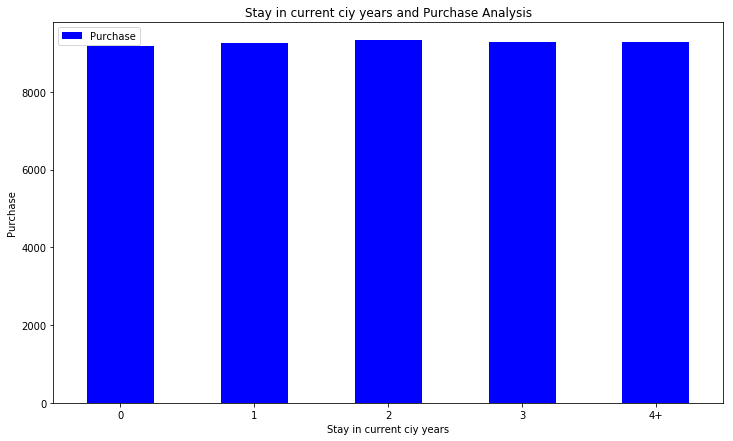

In [80]:
Stay_In_Current_City_Years_pivot = df.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay in current ciy years")
plt.ylabel("Purchase")
plt.title("Stay in current ciy years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

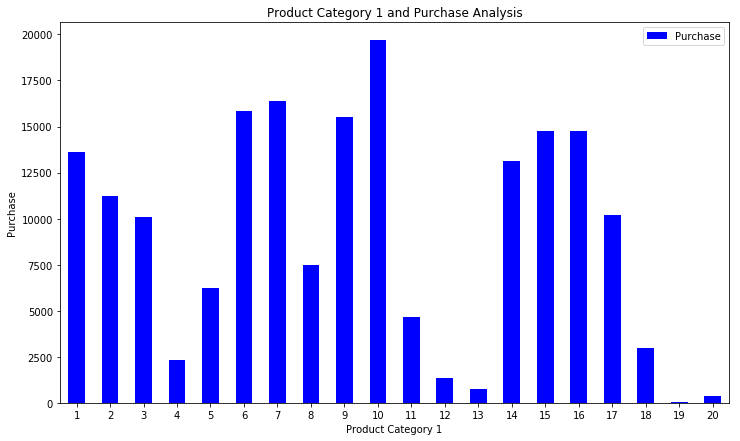

In [47]:
Product_Category_1_pivot = df.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_Category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product Category 1")
plt.ylabel("Purchase")
plt.title("Product Category 1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

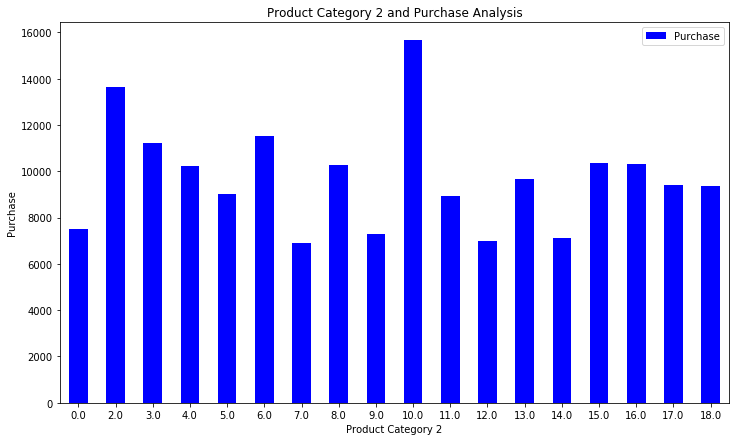

In [48]:
Product_Category_2_pivot = df.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_Category_2_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product Category 2")
plt.ylabel("Purchase")
plt.title("Product Category 2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

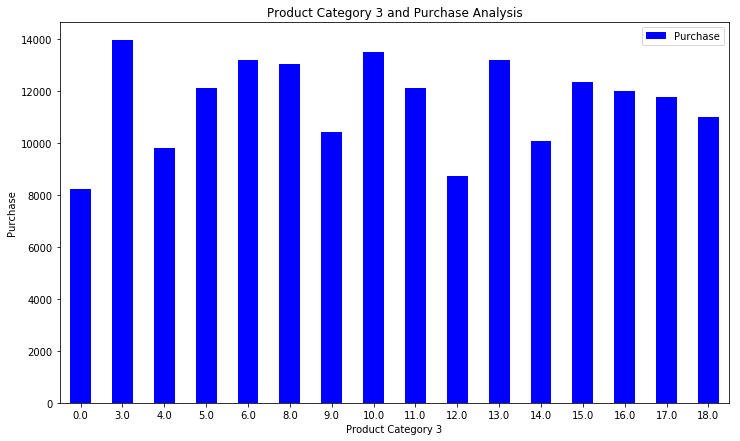

In [49]:
Product_Category_3_pivot = df.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Product_Category_3_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product Category 3")
plt.ylabel("Purchase")
plt.title("Product Category 3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [50]:
X = df_concat_copy.drop('Purchase', axis = 1)

In [51]:
y = df['Purchase']

In [52]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,672,0,0,10,0,2,0,3,0.0,0.0
1,0,2376,0,0,10,0,2,0,1,6.0,14.0
2,0,852,0,0,10,0,2,0,12,0.0,0.0
3,0,828,0,0,10,0,2,0,12,14.0,0.0
4,1,2734,1,6,16,2,4,0,8,0.0,0.0


In [53]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()

In [58]:
fit = lm.fit(X_train, y_train)

In [59]:
pred = lm.predict(X_test)

In [60]:
train_predicts = lm.predict(X_train)
test_predicts = lm.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

4612.182408958806
4616.108226583508


In [61]:
print('Accuracy Score of Linear Regression on train',fit.score(X_train,y_train)*100)
print('Accuracy Score of Linear Regression on test',fit.score(X_test,y_test)*100)

Accuracy Score of Linear Regression on train 15.731838201022274
Accuracy Score of Linear Regression on test 15.45027187017105


In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_reg = DecisionTreeRegressor(min_samples_split=8, min_samples_leaf = 80)

In [64]:
fit = tree_reg.fit(X_train, y_train)

In [65]:
pred = tree_reg.predict(X_test)

In [66]:
train_predicts = tree_reg.predict(X_train)
test_predicts = tree_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

2638.805466210935
2726.074838120234


In [67]:
print('Accuracy Score of Decision Tree on trian',fit.score(X_train,y_train)*100)
print('Accuracy Score of Decison Tree on test',fit.score(X_test,y_test)*100)

Accuracy Score of Decision Tree on trian 72.41548703282655
Accuracy Score of Decison Tree on test 70.51264631601069


In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
forest_regressor = RandomForestRegressor(min_samples_split=8, min_samples_leaf = 80, n_estimators=30)

In [70]:
fit = forest_regressor.fit(X_train, y_train)

In [71]:
pred = forest_regressor.predict(X_test)

In [72]:
train_predicts = forest_regressor.predict(X_train)
test_predicts = forest_regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

2645.36515505411
2709.5004800782863


In [73]:
print('Accuracy Score of Random Forest on train',fit.score(X_train,y_train)*100)
print('Accuracy Score of Random Forest on test',fit.score(X_test,y_test)*100)

Accuracy Score of Random Forest on train 72.27817435339625
Accuracy Score of Random Forest on test 70.87011869020033


In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gradient_booster = GradientBoostingRegressor(n_estimators=1200, min_samples_leaf=80, min_samples_split=8)

In [76]:
fit = gradient_booster.fit(X_train, y_train)

In [77]:
train_predicts = gradient_booster.predict(X_train)
test_predicts = gradient_booster.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

2673.146977940406
2703.673537991698


In [78]:
print('Accuracy Score of Gradient on train',fit.score(X_train,y_train)*100)
print('Accuracy Score of Random Forest on test',fit.score(X_test,y_test)*100)

Accuracy Score of Gradient on train 71.69284343779651
Accuracy Score of Random Forest on test 70.99527505510949
